In [1]:
from typing import List, Dict, Optional
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.pipeline import make_pipeline
from sf_utils import SFStudySet
from utils import get_study_set_metrics_data, get_recording_metrics_data
from collections import defaultdict
from sklearn.metrics import f1_score, accuracy_score
import matplotlib.pyplot as plt
import json
import numpy as np

#ALL_AVAILABLE_STUDY_SETS=['HYBRID_JANELIA', 'LONG_DRIFT', 'LONG_STATIC', 'MANUAL_FRANKLAB', 'PAIRED_BOYDEN', 'PAIRED_CRCNS_HC1', 'PAIRED_ENGLISH', 'PAIRED_KAMPFF', 'PAIRED_MEA64C_YGER', 'PAIRED_MONOTRODE', 'SYNTH_BIONET', 'SYNTH_MAGLAND', 'SYNTH_MEAREC_NEURONEXUS', 'SYNTH_MEAREC_TETRODE', 'SYNTH_MONOTRODE', 'SYNTH_VISAPY']

STUDY_SET_NAMES=['HYBRID_JANELIA', 'LONG_DRIFT', 'LONG_STATIC',
                 'MANUAL_FRANKLAB', 'SYNTH_BIONET', 'SYNTH_MAGLAND',
                 'SYNTH_MEAREC_TETRODE']

METRIC_NAMES = [ "firing_rate", "presence_ratio", "isi_violation",
                 "amplitude_cutoff", "snr", "max_drift", "cumulative_drift",
                 "silhouette_score", "isolation_distance", "l_ratio",
                 "nn_hit_rate", "nn_miss_rate", "d_prime"]
RANDOM_STATE = 0


Electrode type silicon-probe found in study sets: ['HYBRID_JANELIA', 'LONG_DRIFT', 'LONG_STATIC', 'SYNTH_BIONET']
Electrode type tetrode found in study sets: ['MANUAL_FRANKLAB', 'SYNTH_MEAREC_TETRODE']
Electrode type ['tetrode', 'silicon-probe'] found in study sets: ['SYNTH_MAGLAND']
train -  [19376  2751]   |   test -  [4844  688]
train -  [19376  2751]   |   test -  [4844  688]
train -  [19376  2751]   |   test -  [4844  688]
train -  [19376  2751]   |   test -  [4844  688]
train -  [19376  2752]   |   test -  [4844  687]


FileNotFoundError: [Errno 2] No such file or directory: '../../figures/feature_selection/siprobe_feature_importances.pdf'

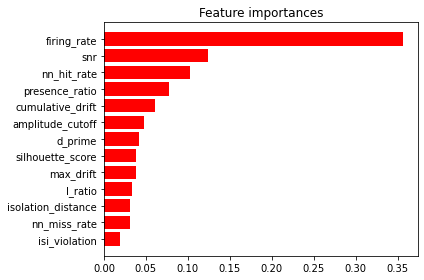

In [2]:
from rfc_helpers import rfc_feature_importance_analysis, split_study_sets_by_electrode_type

study_sets_by_electrode_type = split_study_sets_by_electrode_type(study_set_names=STUDY_SET_NAMES)

rfc_feature_importance_analysis(study_set_names=study_sets_by_electrode_type['silicon-probe'], metric_names=METRIC_NAMES, random_state=RANDOM_STATE, fig_output='../../figures/feature_selection/siprobe_feature_importances.pdf')
rfc_feature_importance_analysis(study_set_names=study_sets_by_electrode_type['tetrode'], metric_names=METRIC_NAMES, random_state=RANDOM_STATE, fig_output='../../figures/feature_selection/tetrode_feature_importances.pdf')

In [ ]:
studies = [study_name for study_set in STUDY_SET_NAMES for study_name in SFStudySet.load(study_set).get_study_names()]
print(studies)
print(len(studies))

In [ ]:
def split_recordings_by_probe_geometry(study_sets: List[SFStudySet], standardize_geometry: Optional[bool] = False) -> Dict[str, List[SFStudySet]]:
    results = defaultdict(list)
    for study_set in study_sets:
        for study in study_set.get_studies():
            for recording in study.get_recordings():
                key = str(recording.geom)
                if standardize_geometry:
                    key = np.array(key)
                    geom = key - key.min()
                    key = str(geom.tolist())
                results[key].append((recording.name, recording.study_name))
    return results

In [8]:
# print(study_sets[1].description)
#

    This synthetic groundtruth is generated by a modifying the Kilosort2 eMouse simulator 
    developed by J. Colonell and M. Pachitariu. This simulator uses averaged
    unit waveforms from the recordings taken from the Kampff laboratory using a densely 
    spaced electrode array (15 x 17 layout spanning 100 x 102 micrometers). A linear probe 
    motion is generated by uniformly translating a 64-channel probe (Neuropixels layout) by 
    20 micrometers over 80 min. To study the effect of time duration and channel count
    on the sorting accuracy, we extracted 8 or 16 channels from the original output 
    (64 chans, 80 min) by taking a contiguous neighboring channels at various 
    time durations (5, 10, 20, 40, 80 min) starting at t=0. Ten recordings were sampled 
    from each channel count and time duration by uniformly varying the channel offsets. 

    The simulation inserted waveform templates at random channels and time points after
    multiplying them by a random scaling

In [25]:
# recordings_split_by_probe_geometry
#

defaultdict(list,
            {'[[43.0, 80.0], [11.0, 80.0], [57.0, 100.0], [27.0, 100.0], [43.0, 120.0], [11.0, 120.0], [57.0, 140.0], [27.0, 140.0], [43.0, 160.0], [11.0, 160.0], [57.0, 180.0], [27.0, 180.0], [43.0, 200.0], [11.0, 200.0], [57.0, 220.0], [27.0, 220.0]]': [('rec_16c_1200s_11',
               'hybrid_drift_siprobe'),
              ('rec_16c_600s_11', 'hybrid_drift_siprobe'),
              ('rec_16c_600s_12', 'hybrid_drift_siprobe'),
              ('rec_16c_1200s_11', 'hybrid_static_siprobe'),
              ('rec_16c_600s_11', 'hybrid_static_siprobe'),
              ('rec_16c_600s_12', 'hybrid_static_siprobe')],
             '[[43.0, 240.0], [11.0, 240.0], [57.0, 260.0], [27.0, 260.0], [43.0, 280.0], [11.0, 280.0], [57.0, 300.0], [27.0, 300.0], [43.0, 320.0], [11.0, 320.0], [57.0, 340.0], [27.0, 340.0], [43.0, 360.0], [11.0, 360.0], [57.0, 380.0], [27.0, 380.0]]': [('rec_16c_1200s_21',
               'hybrid_drift_siprobe'),
              ('rec_16c_600s_21', 'hybrid_drif

[('rec_16c_1200s_11', 'hybrid_drift_siprobe'), ('rec_16c_600s_11', 'hybrid_drift_siprobe'), ('rec_16c_600s_12', 'hybrid_drift_siprobe'), ('rec_16c_1200s_11', 'hybrid_static_siprobe'), ('rec_16c_600s_11', 'hybrid_static_siprobe'), ('rec_16c_600s_12', 'hybrid_static_siprobe')]
[('rec_16c_1200s_21', 'hybrid_drift_siprobe'), ('rec_16c_600s_21', 'hybrid_drift_siprobe'), ('rec_16c_600s_22', 'hybrid_drift_siprobe'), ('rec_16c_1200s_21', 'hybrid_static_siprobe'), ('rec_16c_600s_21', 'hybrid_static_siprobe'), ('rec_16c_600s_22', 'hybrid_static_siprobe')]
[('rec_16c_1200s_31', 'hybrid_drift_siprobe'), ('rec_16c_600s_31', 'hybrid_drift_siprobe'), ('rec_16c_600s_32', 'hybrid_drift_siprobe'), ('rec_16c_1200s_31', 'hybrid_static_siprobe'), ('rec_16c_600s_31', 'hybrid_static_siprobe'), ('rec_16c_600s_32', 'hybrid_static_siprobe')]
[('rec_32c_1200s_11', 'hybrid_drift_siprobe'), ('rec_32c_600s_11', 'hybrid_drift_siprobe'), ('rec_32c_600s_12', 'hybrid_drift_siprobe'), ('rec_32c_1200s_11', 'hybrid_static

/tmp/ipykernel_46836/2999643031.py:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


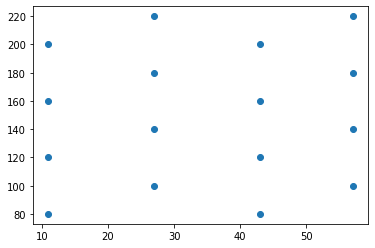

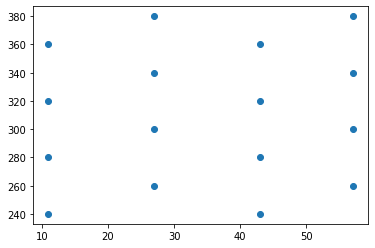

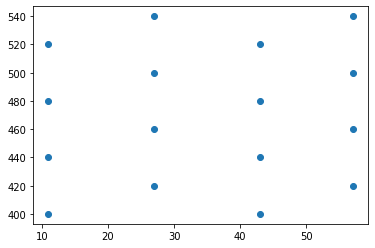

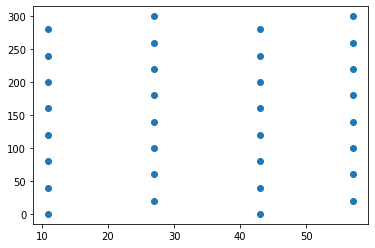

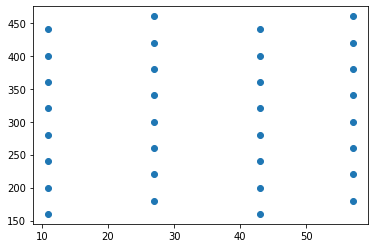

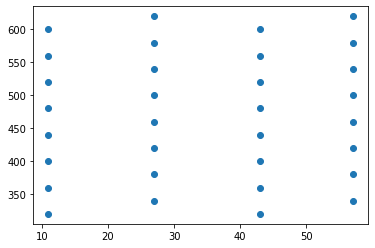

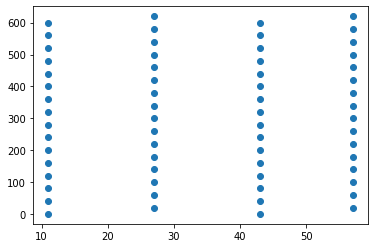

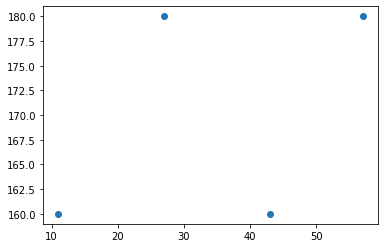

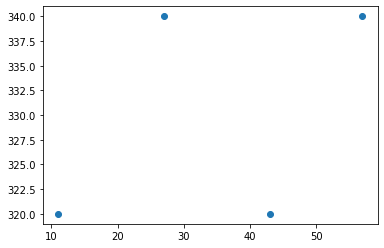

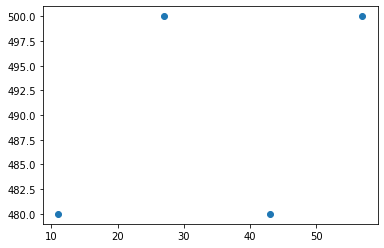

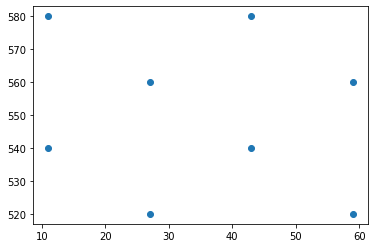

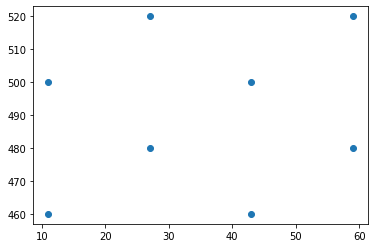

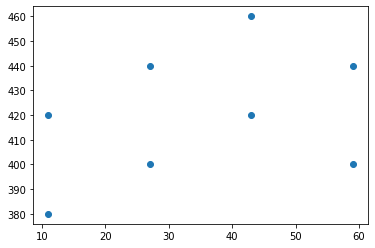

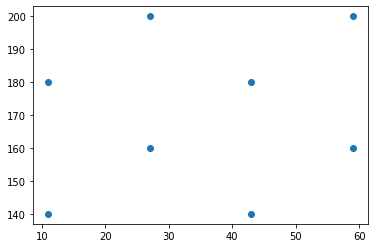

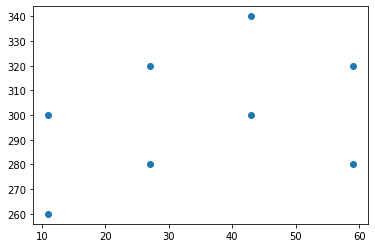

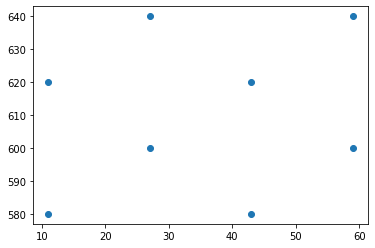

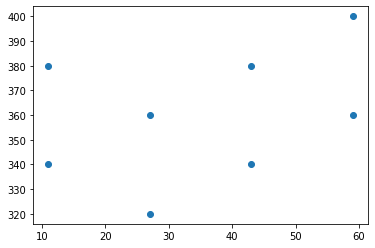

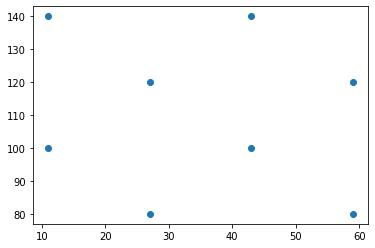

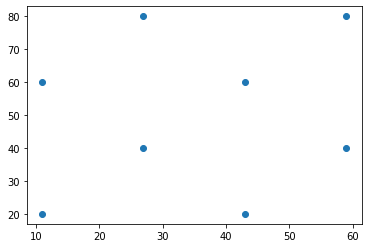

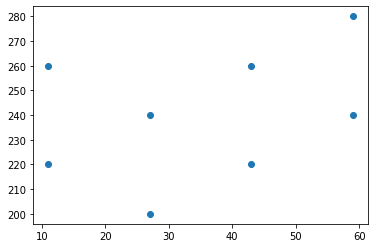

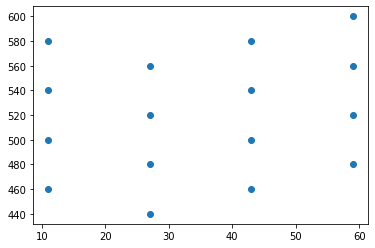

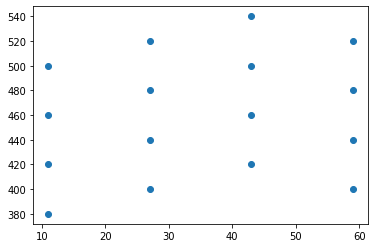

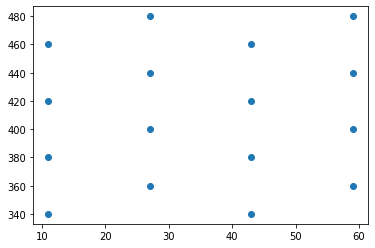

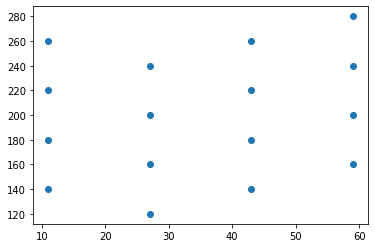

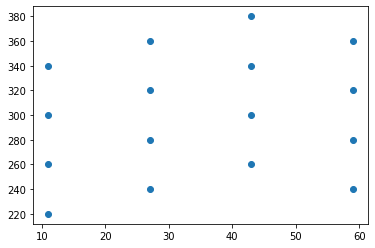

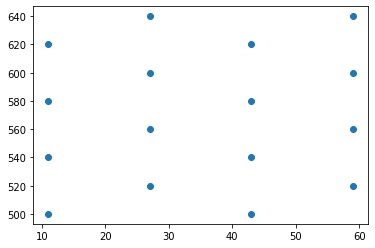

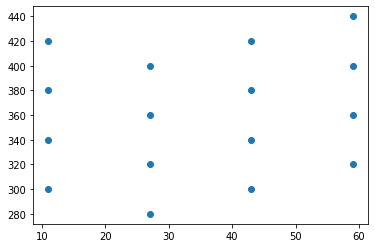

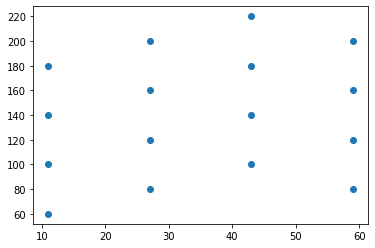

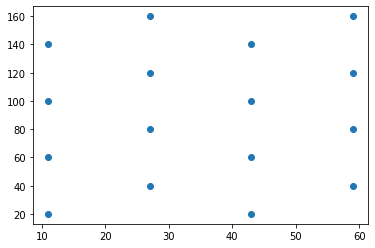

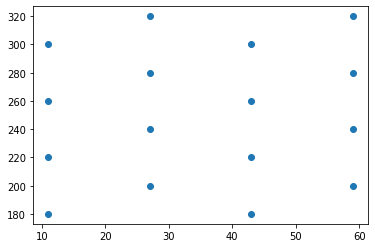

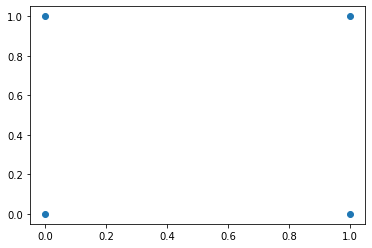

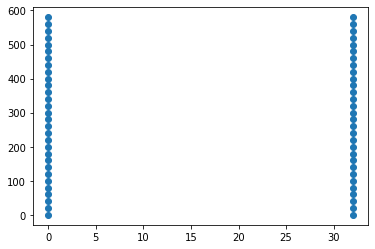

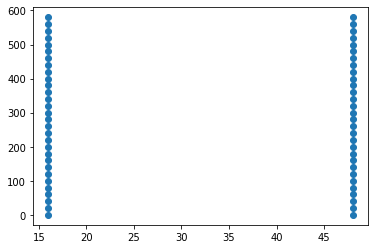

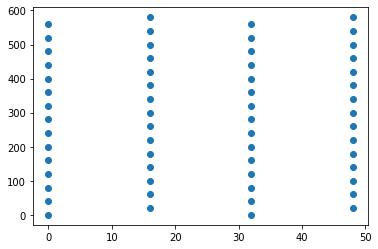

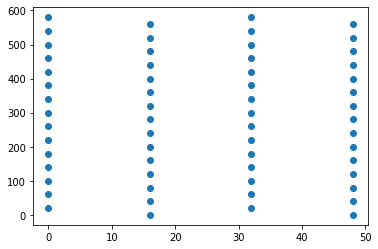

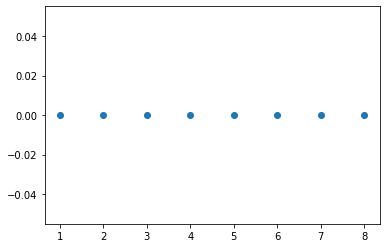

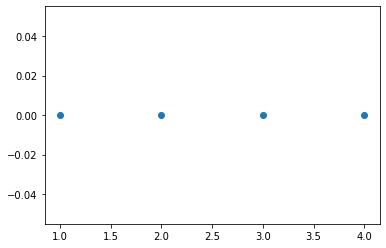

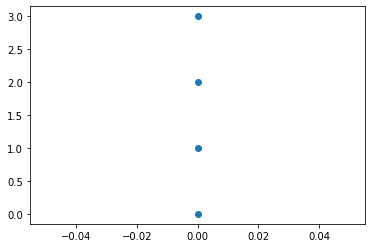

In [26]:
# geometries = {}
#
# for i, geometry in enumerate(recordings_split_by_probe_geometry.keys()):
#     print(recordings_split_by_probe_geometry[geometry])
#     # dataset = get_recording_metrics_data(recording_names=recording_names,
#     #                                      train_test_split=True
#     #                                      )
#     #
#     # svc_model = make_pipeline(StandardScaler(), SVC(kernel='linear'))
#     # svc_model.fit(dataset['X_train'], dataset['y_train'])
#     #
#     # y_test_preds = svc_model.predict(dataset['X_test'])
#     # svc_f1 = f1_score(dataset['y_test'], y_test_preds)
#     #
#     # print(f'Linear SVC F1-Score is {svc_f1}')
#     # print(accuracy_score(dataset['y_test'], y_test_preds))
#     geometries[i] = recordings_split_by_probe_geometry[geometry]
#
#     fig, ax = plt.subplots()
#     x, y = zip(*list(eval(geometry)))
#     ax.scatter(x, y)
#     # fig.suptitle(f'Trained on {dataset["X_train"].shape[0]}; tested on {dataset["X_test"].shape[0]}; F1={svc_f1}')
#     plt.savefig(f'../figures/split_by_geometry/{i}.pdf')
#
# with open('../figures/split_by_geometry/geometries.json', 'a') as f:
#     json.dump(geometries, f, indent=4)

In [41]:
#dataset = get_study_set_metrics_data(STUDY_SET_NAMES, train_test_split=True, one_hot_encode_sorter_name=True)
def score(study_set_names: List[str], model, one_hot_encode_sorter_name=False):
    dataset = get_study_set_metrics_data(study_set_names, train_test_split=True, one_hot_encode_sorter_name=one_hot_encode_sorter_name)
    print(dataset['X_train'].shape)

    model.fit(dataset['X_train'], dataset['y_train'])

    y_test_preds = model.predict(dataset['X_test'])
    f1 = f1_score(dataset['y_test'], y_test_preds)

    print(f'Linear SVC F1-Score is {f1}')
    print(accuracy_score(dataset['y_test'], y_test_preds))

